# digits 使用 PCA 降维

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [2]:
# 获得digits数据
digits = datasets.load_digits()
x = digits.data
y = digits.target

In [3]:
# train and test 分离
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 666)

## 先使用KNN算法直接对原始数据进行分类

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn_ner = KNeighborsClassifier(n_jobs=-1)
%time knn_ner.fit(x_train, y_train)
KNN_score = knn_ner.score(x_test, y_test)

Wall time: 1.99 ms


In [5]:
KNN_score

0.9866666666666667

## 使用PCA对数据进行降维处理

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=64)
pca.fit(x_train)
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform(x_test)

In [7]:
knn_ne_pca = KNeighborsClassifier(n_jobs=-1)
%time knn_ne_pca.fit(x_train_reduction, y_train)
knn_ne_pca_score = knn_ne_pca.score(x_test_reduction, y_test)
knn_ne_pca_score

Wall time: 4.02 ms


0.9866666666666667

## 对于pca降维参数的选择

In [8]:
pca.explained_variance_ratio_  # pca降维效果参数指标

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

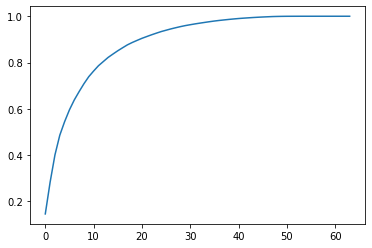

In [9]:
plt.plot([i for i in range(x_train.shape[1])], [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(x_train.shape[1])])
plt.show()

In [10]:
pca_new = PCA(0.90)  #传入参数为解释样本方差的比率
pca_new.fit(x_train)
x_train_pca = pca_new.transform(x_train)
x_test_pca = pca_new.transform(x_test)

In [11]:
knn_l = KNeighborsClassifier(n_jobs=-1)
%time knn_l.fit(x_train_pca, y_train)
score = knn_l.score(x_test_pca, y_test)

Wall time: 996 µs


In [12]:
score

0.98

## 查看pca二维数据的含义

In [14]:
pca_2 = PCA(n_components=2)
pca_2.fit(x)

x_reduction_2 = pca_2.transform(x)

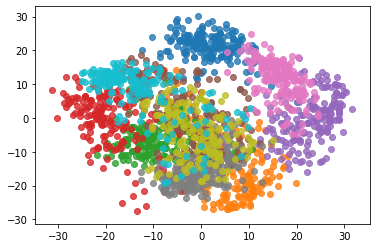

In [15]:
for i in range(10):
    plt.scatter(x_reduction_2[y==i, 0], x_reduction_2[y==i, 1], alpha=0.8)
plt.show()